<a href="https://colab.research.google.com/github/JayV1I/Aulas-pucc/blob/main/Calculo_I_2024_Projeto_2_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = Blue>**Projeto II de Cálculo I - Curso de Ciência de Dados e Inteligência Artificial**

João Vitor Oliveira Paula ra: 23007781

Lucas Alain Catasiner ra: 23009551

Matheus Elias ra: 23007354

Rafael Mateus de Freitas ra: 23010763


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, diff, solve


utilizando como base os notebooks 10, 11 e 13 para otimizar os problemas propostos

## **Problema 1**

*3,0 pontos*

Durante várias semanas, o departamento de trânsito de uma certa cidade vem registrando a velocidade dos veículos que passam por um certo cruzamento. Os resultados mostram que entre 13 e 18 horas, a velocidade média neste cruzamento é dada aproximadamente por

$v(t) = t^3 - 10.5t^2 + 30t + 20$
  
onde t é o número de horas após o meio-dia e v(t) é a velocidade média em km/h. Qual o instante, entre 13 e 18 horas, em que o trânsito é mais rápido? E qual o instante em que ele é mais lento? Qual é a velocidade máxima? Qual é a velocidade mínima?

**Atenção:** embora já tenham resolvido esse exercício na aula teórica, aqui vocês precisam resolver utilizando as técnicas apresentadas nas aulas práticas (python). Não utilizem técnicas (atalhos) que não foram utilizadas ou autorizadas nos notebooks práticos.  

**Dica:** utilizem os notebooks de pontos máximos e mínimos (aulas 10 e 11)

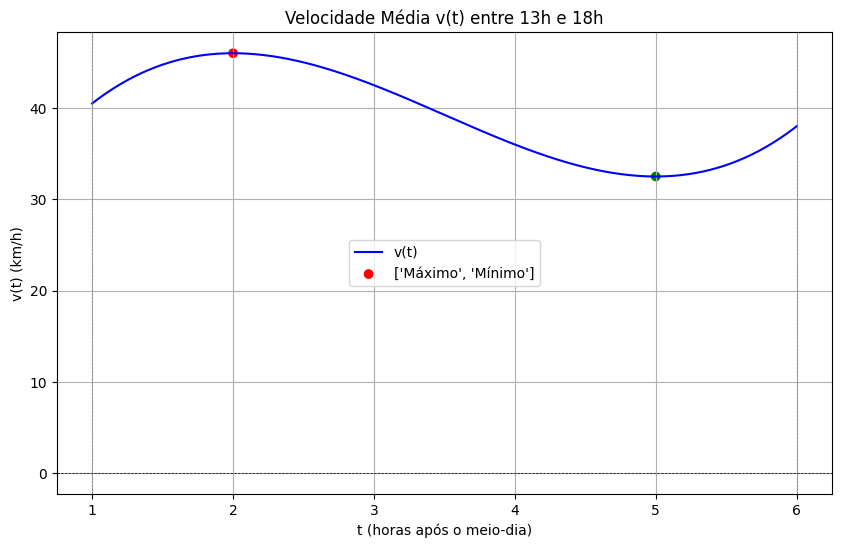

([2.00000000000000, 5.00000000000000],
 2.00000000000000,
 5.00000000000000,
 46.0000000000000,
 32.5000000000000)

In [13]:

t = symbols('t', real=True)
v = t**3 - 10.5*t**2 + 30*t + 20

v_prime = diff(v, t)
critical_points = solve(v_prime, t)
interval = [1, 6]
critical_points = [p for p in critical_points if interval[0] <= p <= interval[1]]
evaluations = {p: v.subs(t, p) for p in critical_points + interval}

max_point = max(evaluations, key=evaluations.get)
min_point = min(evaluations, key=evaluations.get)

t_vals = np.linspace(interval[0], interval[1], 500)
v_vals = [v.subs(t, t_val) for t_val in t_vals]

plt.figure(figsize=(10, 6))
plt.plot(t_vals, v_vals, label='v(t)', color='blue')
plt.scatter([float(max_point), float(min_point)],
            [evaluations[max_point], evaluations[min_point]],
            color=['red', 'green'], label=['Máximo', 'Mínimo'])
plt.title('Velocidade Média v(t) entre 13h e 18h')
plt.xlabel('t (horas após o meio-dia)')
plt.ylabel('v(t) (km/h)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(interval[0], color='gray', linewidth=0.5, linestyle='--')
plt.axvline(interval[1], color='gray', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

critical_points, max_point, min_point, evaluations[max_point], evaluations[min_point]


resposta A)

.

Instante trânsito mais rápido (máxima): t=2 horas após o meio-dia (ou seja, às 14h).

Velocidade máxima: 46,00 km/h.

Instante trânsito mais lento (mínima): *t=5 *horas após o meio-dia (ou seja, às 17h).

Velocidade mínima: 32,50 km/h.

## **Problema 2**

*3,5 pontos*

Uma das tarefas mais recorrentes em projetos de IA é a predição. Um exemplo de predição é quando temos duas variáveis $x$ e $y$ que estão linearmente correlacionadas e queremos predizer o valor de $y$ para um determinado valor de $x$. Para modelar esse tipo de problema, se usa um algoritmo de *Machine* *Learning* denominado **Regressão Linear**. Essa técnica de *Machine* *Learning* utiliza Matemática e Estatísitca para determinar os coeficientes da reta $y = ax +b$ que melhor se ajusta aos pontos do diagrama de dispersão (*scatterplot*) das variáveis $x$ e $y$ (quando eles seguem aproximadamente uma tendência linear). Para se medir a qualidade do ajuste, ou seja, escolher a melhor reta, se usa uma **função objetivo ou função de custo ou de perda**, denominada *Loss* (em inglês). No caso do ajuste linear, a função de *Loss* mais utilizada é o erro quadrático médio - MSE (*Mean Square Error*). O processo funciona da seguinte maneira:
- Suponha que o parâmetro $b$ já é conhecido (já foi determinado)
- Varia-se o valor do parâmetro $a$ dentro de um intervalo e refinamento pré-definidos conforme o contexto do problema
- Para cada valor do parâmetro $a$, calcula-se o erro MSE (*Loss*) entre os valores reais (y) e os valores estimados pela reta (yhat ou y_fit).
- Faz-se a curva de *Loss* (plota-se os valores do erro MSE em função de $a$).
- Devido à natureza desse tipo do ajuste linear, a curva de *Loss* sempre terá o formato de "U", isto é, uma curva côncava.
- **Utilizando-se derivadas**, se determina o ponto de mínimo **a_ótimo** da curva (em ML esse algoritmo de otimização é chamado de *Gradiente Descendente*)
- O ponto **a_ótimo** encontrado é o valor do parâmetro $a$ que minimiza o erro do ajuste, ou seja, maximiza a qualidade do ajuste (coeficiente da melhor reta)
- Assim, a reta com melhor qualidade de ajuste fica determinada e pode ser usada para predizer o valor de $y$ quando é fornecido um novo valor de $x$.

Para aplicar o processo acima, considere as variáveis $x$ e $y$ do dataset df abaixo.
Considere que o valor do parêmetro $b$ já foi determinado e vale 7. Assim, a reta a ser determinada é $y = ax + 7$. Para determinar o valor do parâmetro $a$
que otimiza a reta, use o processo descrito acima e determine o valor de $a$ ótimo com 5 casas decimais de precisão. Qual é a predição para o valor de $y$ quando $x = 16$? O valor de $y$ pode ser arredondado com duas casas decimais de precisão.

In [3]:
df = pd.DataFrame({"x": [1,2,3,4,5,6,8,9,12,13,14,15], "y": [7,8,8,9,10,9,11,10,11,15,14,16]})
df.head()

,x,y
0,1,7
1,2,8
2,3,8
3,4,9
4,5,10


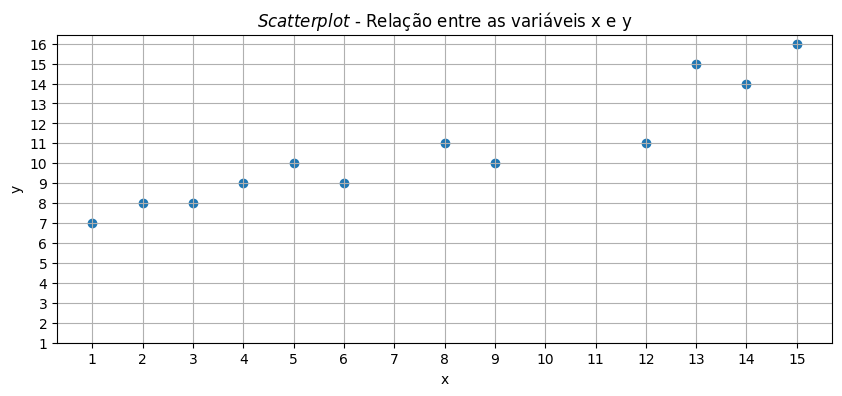

In [4]:
plt.figure(figsize=(10,4))
plt.scatter(df.x, df.y)
plt.xticks(np.arange(1,16,1))
plt.yticks(np.arange(1,17,1))
plt.xlabel("x")
plt.ylabel('y')
plt.grid()
plt.title("$Scatterplot$ - Relação entre as variáveis x e y")
plt.show()

-**A)** Utilizando o processo descrito acima, determine o valor de $a$ ótimo com 5 casas decimais de precisão.

**Dica:** veja o notebook *Aula_11_Extra_Otimização_Machine_Learning*.

In [11]:

df = pd.DataFrame({
    "x": [1, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15],
    "y": [7, 8, 8, 9, 10, 9, 11, 10, 11, 15, 14, 16]
})
b = 7
def mse(a, x, y, b):
    y_hat = a * x + b
    return np.mean((y - y_hat)**2)


a_values = np.linspace(-2, 2, 10000)
mse_values = [mse(a, df['x'], df['y'], b) for a in a_values]
a_optimal = a_values[np.argmin(mse_values)]


a_optimal_rounded = round(a_optimal, 5)
print(f"Valor ótimo de a (arredondado): {a_optimal_rounded}")


Valor ótimo de a (arredondado): 0.49905


-**B)** Qual é a predição para o valor de $y$ quando $x = 16$? O valor de $y$ pode ser arredondado com duas casas decimais de precisão.

In [6]:
a = 0.49904
b = 7
x = 16

y = a * x + b
y = round(y, 2)
print(f"A predição para y quando x = {x} é: {y}")


A predição para y quando x = 16 é: 14.98


## **Problema 3**

*3,5 pontos*

Em *Data Science* se usa com frequência o conceito de probabilidade que, por debaixo do capô, utiliza o conceito de integral.  Por exemplo, quando uma variável $x$ é contínua, a probabilidade *p* da variável $x$ pertencer a um dado intervalo [a, b] é calculada aplicando-se uma integral definida sobre a **função $f(x)$ de densidade de probabilidade da variável x** no intervalo [a, b].

Veja na figura abaixo uma distribuição de dados (à esquerda) e sua modelagem pela função de densidade de probabilidade (à direita).
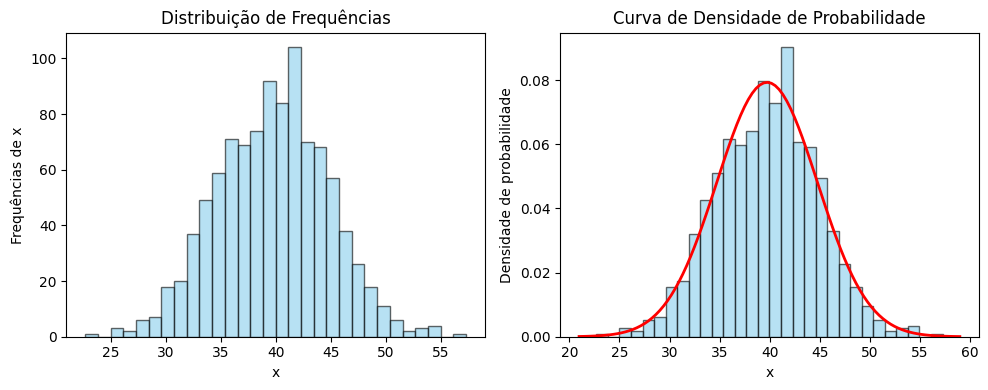

O gráfico à esquerda é a distribuição de frequência usual da variável x, com os valores absolutos da frequência de cada subintervalo. Já no gráfico à direita, as frequências dos subtintervalor foram transformadas em relativas (porcentagem decimal), cuja soma é igual a 1 (100%). Com isso, a curva que representa a distribuição percentual (curva de densidade de probabilidade) tem uma propriedade muito importante: **a área total sob essa curva é igual a 1 (de $-∞$ a $+∞$).**

Portanto, para calcular, por exemplo, a probabilidade da variável x assumir um valor entre 35 e 45, **basta calcular a área sob a curva no intervalo [35, 45]**, como ilustrado na figura abaixo.
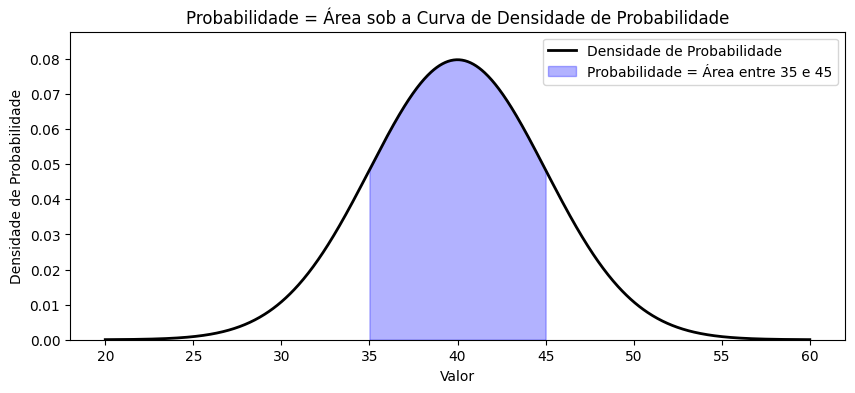

Essa área pode ser calculada por Soma de Riemann (aproximação por retângulos), como ilustra a figura a seguir.
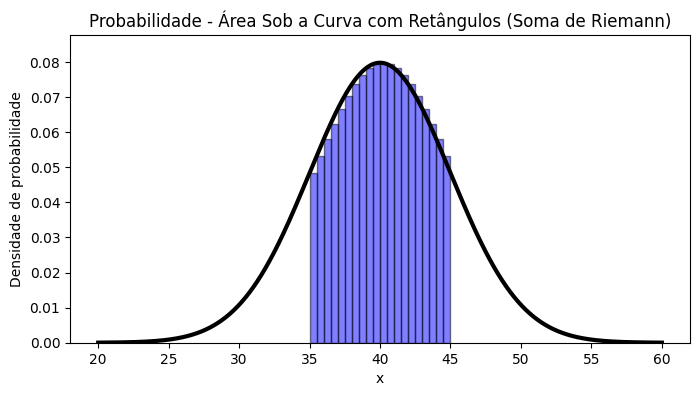

Mas, para fazer essa aproximação por soma de Riemann, precisamos da função de densidade de probabilidade $f(x)$.

Felizmente, a teoria estatística já nos fornece esse modelo matemático.

**Quando os dados têm uma distribuição normal** com **média $μ$** e **desvio padrão $σ$**, a função de densidade de probabilidade $f(x)$ é dada por:

$f(x)=\frac{1}{σ\sqrt{2\pi}}e^{\frac{-(x-μ)^{2}}{2σ^{2}}}$

Veja que para obtermos o modelo matemático da função densidade de probabilidade normal, basta conhecermos a média $μ$ e desvio padrão $σ$.

Por exemplo, se a distribuição da variável $x$ tem média $μ = 20$ e desvio padrão $σ = 3$, a função de densidade de probabilidade normal fica:

$f(x)=\frac{1}{3\sqrt{2\pi}}e^{\frac{-(x-20)^{2}}{2*3^{2}}}$

Ou de forma simplificada:

$f(x)=\frac{1}{3\sqrt{2\pi}}e^{\frac{-(x-20)^{2}}{18}}$

**Conclusão:** conhecendo-se a média e o desvio padrão da distribuição normal de uma **variável contínua x**, podemos calcular a probabilidade de x pertencer a qualquer intervalo [a, b] solicitado, usando aproximação por *Soma de Riemann*.

- **A) Faça o gráfico da função densidade de probabilidade normal f(x) dada acima.**

 **Observação:** limite o intervalo da variável x de 8 a 32, pois são suficientes 4 desvios padrão (4*3=12) de cada lado para se captar a essência da curva normal (curva de densidade de probabilidade normal).

Média (
μ=20)

Desvio padrão (
σ=3)

Intervalo de

x de 8 a 32.

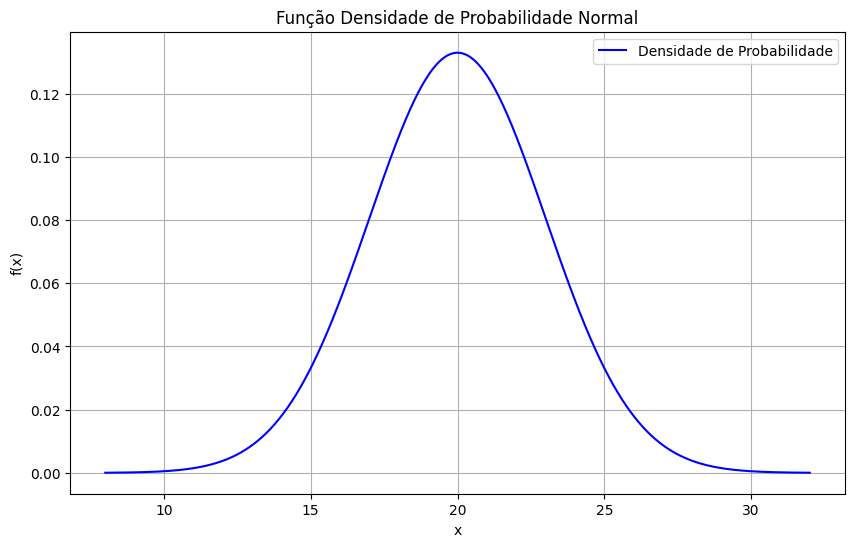

In [15]:
mu = 20
sigma = 3
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

x = np.linspace(8, 32, 1000)
y = normal_pdf(x, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Densidade de Probabilidade', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função Densidade de Probabilidade Normal')
plt.grid()
plt.legend()
plt.show()


- **B) Escolhido um dado dessa distribuição ao acaso, calcule a probabilidade do seu valor estar entre 14 e 26**. Encontre a resposta com 4 casas decimais de precisão.

Note que, calcular essa probabilidade, de acordo com o enunciado, é calcular a área sob a curva $f(x)$ no intervalo $[14, 26]$.

**Atenção:** para calcular essa área use aproximação por soma de Riemann.

Faça o plot dos retângulos sob a curva, mas não é necessário plotar todos os retângulos utilizados no cálculo da aproximação da área. Plote um número pequeno de retângulos (no máximo 500) apenas para ilustração. Mas atenção, no cálculo da estimativa da área, você precisará utilizar muito mais retângulos.

**Dica:** Veja o notebook *Aula_13_Area_Soma_Riemann_com_Plot* disponível no Canvas.

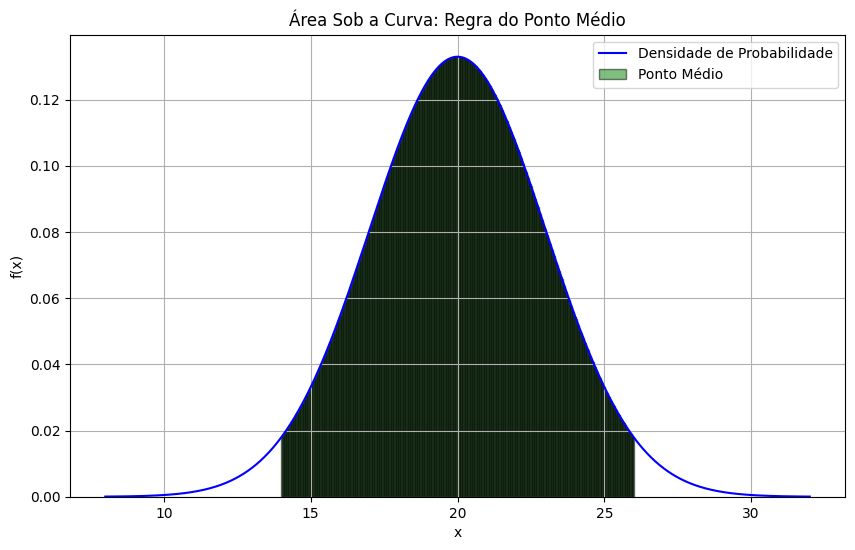

Probabilidade aproximada de x estar entre 14 e 26 (Ponto Médio): 0.9545


In [16]:

a = 14
b = 26
N = 100000
dx = (b - a) / N
x_midpoints = np.linspace(a + dx / 2, b - dx / 2, N)
area_midpoint = np.sum(normal_pdf(x_midpoints, mu, sigma) * dx)

N_plot = 500
dx_plot = (b - a) / N_plot
x_midpoints_plot = np.linspace(a + dx_plot / 2, b - dx_plot / 2, N_plot)
y_midpoints_plot = normal_pdf(x_midpoints_plot, mu, sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Densidade de Probabilidade', color='blue')
plt.bar(x_midpoints_plot, y_midpoints_plot, width=dx_plot, color='green', alpha=0.5, edgecolor='black', label='Ponto Médio')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Área Sob a Curva: Regra do Ponto Médio')
plt.grid()
plt.legend()
plt.show()

print(f"Probabilidade aproximada de x estar entre {a} e {b} (Ponto Médio): {area_midpoint:.4f}")
